In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import folium

Load data

In [2]:
# Load data from the CSV file into a new DataFrame
data = pd.read_csv('../model/gps_data.csv')
data

,Person ID,Latitude,Longitude,Altitude,Timestamp
0,0,39.984702,116.318417,492.000000,2008-10-23 02:53:04
1,0,39.984683,116.318450,492.000000,2008-10-23 02:53:10
2,0,39.984686,116.318417,492.000000,2008-10-23 02:53:15
3,0,39.984688,116.318385,492.000000,2008-10-23 02:53:20
4,0,39.984655,116.318263,492.000000,2008-10-23 02:53:25
...,...,...,...,...,...
18165796,181,39.988783,116.299000,114.829396,2008-02-17 10:43:09
18165797,181,39.989500,116.298667,98.425197,2008-02-17 10:43:56
18165798,181,39.990067,116.298350,131.233596,2008-02-17 10:44:26
18165799,181,39.989517,116.298417,150.918635,2008-02-17 10:45:23


Load transportation data

In [3]:
# Load data from the CSV file into a new DataFrame
data_labels = pd.read_csv('../model/labels_data.csv')
data_labels

,Start Time,End Time,Transportation Mode
0,2007/06/26 11:32:29,2007/06/26 11:40:29,bus
1,2008/03/28 14:52:54,2008/03/28 15:59:59,train
2,2008/03/28 16:00:00,2008/03/28 22:02:00,train
3,2008/03/29 01:27:50,2008/03/29 15:59:59,train
4,2008/03/29 16:00:00,2008/03/30 15:59:59,train
...,...,...,...
14713,2008/11/17 06:59:58,2008/11/17 07:06:16,bus
14714,2008/11/17 07:06:16,2008/11/17 07:14:32,walk
14715,2008/11/29 01:58:05,2008/11/29 02:01:39,bus
14716,2008/11/29 02:01:39,2008/11/29 02:07:57,walk


Distribution of transportation nodes

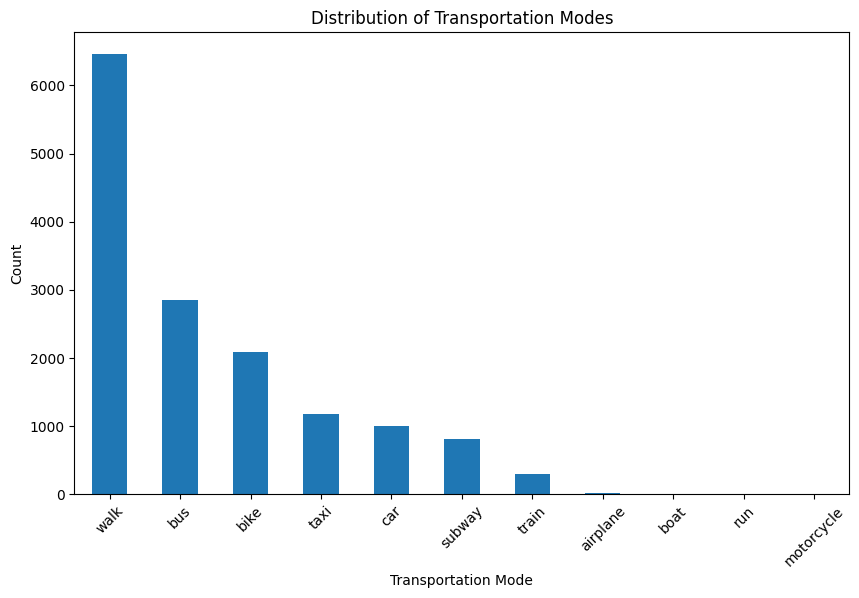

In [4]:
x = data_labels['Transportation Mode'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
x.plot(kind='bar')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.title('Distribution of Transportation Modes')
plt.xticks(rotation=45)
plt.show()

Heatmap GPS density

In [5]:
n_samples = 20000
gps_data = pd.read_csv('../model/gps_data.csv').sample(n=n_samples)

fig = px.density_mapbox(
	gps_data, 
	lat='Latitude', 
	lon='Longitude', 
	radius=10,
	center=dict(lat=gps_data['Latitude'].mean(), lon=gps_data['Longitude'].mean()),
	zoom=10,
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


Clusterring data

In [6]:
n_samples = 50000
data2 = pd.read_csv('../model/gps_data.csv').sample(n=n_samples)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data2[['Latitude', 'Longitude']])

# Get cluster labels for each data point
cluster_labels = kmeans.labels_
data2['Cluster'] = cluster_labels


c:\Users\danstorm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [7]:
m = folium.Map(location=[data2['Latitude'].mean(), data2['Longitude'].mean()], zoom_start=10)

cluster_color = ['blue', 'red', 'yellow', 'pink', 'black']

for cluster in data2['Cluster'].unique():
	cluster_data = data2[data2['Cluster'] == cluster]
	for index, row in cluster_data.iterrows():
		folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=f'{cluster_color[cluster]}').add_to(m)

m.save('../files/graphs/cluster_map_geolife.html')

Display on a map

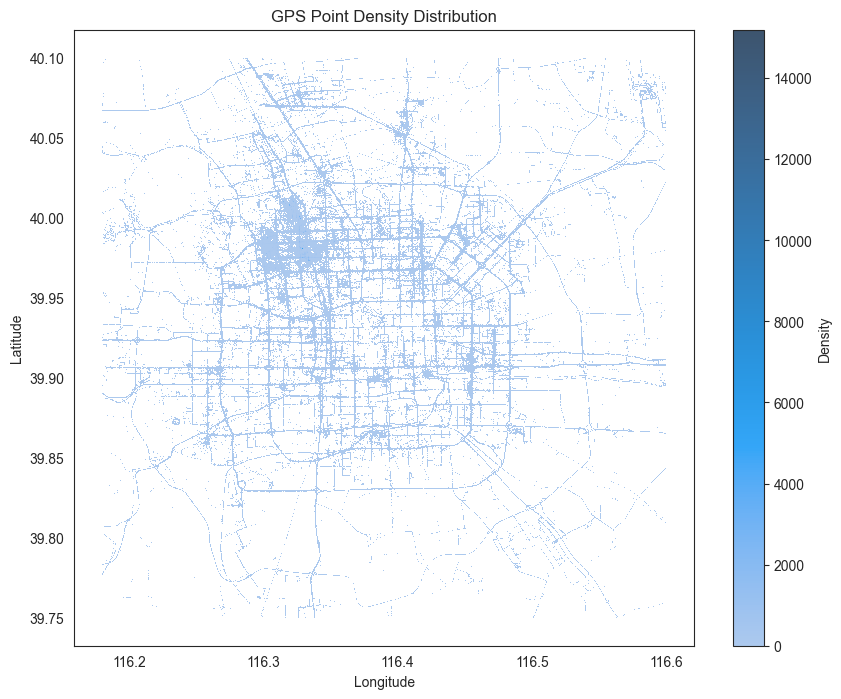

In [8]:
# Create a folium map centered on Beijing
my_map = folium.Map(location=[39.90, 116.41], zoom_start=12)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=data, x='Longitude', y='Latitude', bins=2600, cbar=True, cbar_kws={'label': 'Density'}, ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('GPS Point Density Distribution')

plt.savefig('../img/density_plot_geolife.png', dpi=300)